In [1]:
import pandas as pd # We import pandas
import numpy as np # We import other necessary libraries
import matplotlib.pyplot as plt
from datetime import datetime # This will allow us to manually create dates

In [11]:
index = pd.date_range(start='2023', periods=24, freq='M')
data = np.random.randint(100, 500, size=24)

C:\Users\estca\AppData\Local\Temp\ipykernel_25000\4198947276.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2023', periods=24, freq='M')


In [30]:
df = pd.DataFrame({'data': data}, index=index)
df.head()

,data
2023-01-31,437
2023-02-28,111
2023-03-31,129
2023-04-30,329
2023-05-31,248


In [31]:
df['lagged'] = df["data"].shift(periods=-1) # We shift 1 days backward
df['shifted'] = df["data"].shift(periods=1) # We shift 1 days forward

In [32]:
df['pct_change'] = df["data"].pct_change().mul(100)
df

,data,lagged,shifted,pct_change
2023-01-31,437,111.0,NaN,NaN
2023-02-28,111,129.0,437.0,-74.599542
2023-03-31,129,329.0,111.0,16.216216
2023-04-30,329,248.0,129.0,155.038760
2023-05-31,248,136.0,329.0,-24.620061
2023-06-30,136,188.0,248.0,-45.161290
2023-07-31,188,319.0,136.0,38.235294
2023-08-31,319,215.0,188.0,69.680851
2023-09-30,215,124.0,319.0,-32.601881
2023-10-31,124,411.0,215.0,-42.325581


<Axes: title={'center': 'Variación % de la variable macroeconómica'}>

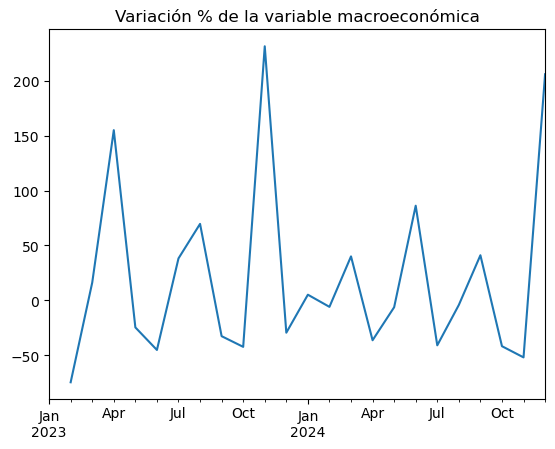

In [33]:
plt.title("Variación % de la variable macroeconómica")
df["pct_change"].plot()

In [59]:
df_q = df.resample("Q").bfill()
df_q

C:\Users\estca\AppData\Local\Temp\ipykernel_25000\3653659471.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df.resample("Q").bfill()


,data,lagged,shifted,pct_change
2023-03-31,129,329.0,111.0,16.216216
2023-06-30,136,188.0,248.0,-45.161290
2023-09-30,215,124.0,319.0,-32.601881
2023-12-31,290,305.0,411.0,-29.440389
2024-03-31,402,256.0,287.0,40.069686
2024-06-30,447,264.0,240.0,86.250000
2024-09-30,357,208.0,253.0,41.106719
2024-12-31,306,NaN,100.0,206.000000


In [61]:
df_q.asfreq("M").interpolate()

C:\Users\estca\AppData\Local\Temp\ipykernel_25000\4070722056.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_q.asfreq("M").interpolate()


,data,lagged,shifted,pct_change
2023-03-31,129.000000,329.000000,111.000000,16.216216
2023-04-30,131.333333,282.000000,156.666667,-4.242953
2023-05-31,133.666667,235.000000,202.333333,-24.702121
2023-06-30,136.000000,188.000000,248.000000,-45.161290
2023-07-31,162.333333,166.666667,271.666667,-40.974821
2023-08-31,188.666667,145.333333,295.333333,-36.788351
2023-09-30,215.000000,124.000000,319.000000,-32.601881
2023-10-31,240.000000,184.333333,349.666667,-31.548050
2023-11-30,265.000000,244.666667,380.333333,-30.494220
2023-12-31,290.000000,305.000000,411.000000,-29.440389
